Handling Imbalanced Datasets is a crucial part of machine learning, as many real-world problems (e.g., fraud detection, medical diagnosis) involves one class significantly outnumbering another.

### 1. Resampling Techniques
Resampling alters the dataset to make classes more balanced. There are two strategies:

##### - Oversampling (Increase Minority Class)
This involves increasing the number of samples in the minority class by duplicating existing ones or generating synthetic samples.

In [2]:
! pip install imblearn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Random Oversampling
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 10000,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    weights = [0.2, 0.8],
    random_state = 42
)

In [7]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)

final_df.head()

,feature1,feature2,target
0,0.639699,0.508320,1
1,-1.381197,1.390041,0
2,0.564351,0.467320,1
3,1.130436,0.496788,1
4,0.652070,0.566991,1


target
1    7972
0    2028
Name: count, dtype: int64


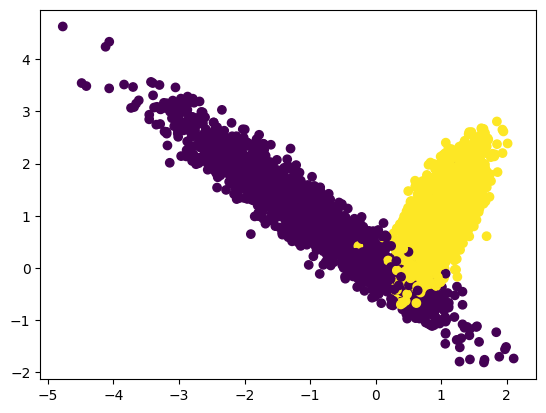

In [11]:
import matplotlib.pyplot as plt

print(final_df['target'].value_counts())
plt.scatter(final_df['feature1'], final_df['feature2'], c=final_df['target'])
plt.show()

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(np.int64(0), 7972), (np.int64(1), 7972)]


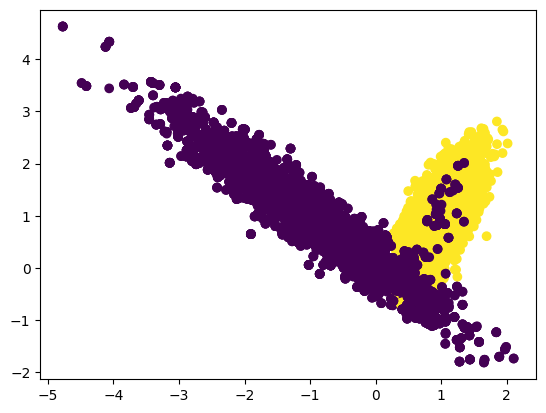

In [15]:
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled)

##### - Undersampling (Reduce Majority Class)
Removes some majority class samples to balance the dataset.

In [ ]:
# Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

[((np.float64(-4.772928193769114), np.float64(4.629391171246044)), 1), ((np.float64(-4.48508024835245), np.float64(3.544315200888186)), 1), ((np.float64(-4.413501339394825), np.float64(3.4864495833642533)), 1), ((np.float64(-4.12001427151287), np.float64(4.2401913784425265)), 1), ((np.float64(-4.06508568829873), np.float64(3.442098873553931)), 1), ((np.float64(-4.063921213167081), np.float64(4.336660268693046)), 1), ((np.float64(-3.83795017774589), np.float64(3.5159585280579435)), 1), ((np.float64(-3.731917976154564), np.float64(3.0671736037697728)), 1), ((np.float64(-3.701199767540206), np.float64(3.4685225155067156)), 1), ((np.float64(-3.685541804123349), np.float64(3.0841159323927294)), 1), ((np.float64(-3.6542065586230867), np.float64(3.150033329737359)), 1), ((np.float64(-3.61389116739679), np.float64(3.2122402404433275)), 1), ((np.float64(-3.454476394741937), np.float64(2.848635360115873)), 1), ((np.float64(-3.4539260060917596), np.float64(2.936848404394799)), 1), ((np.float64(-3

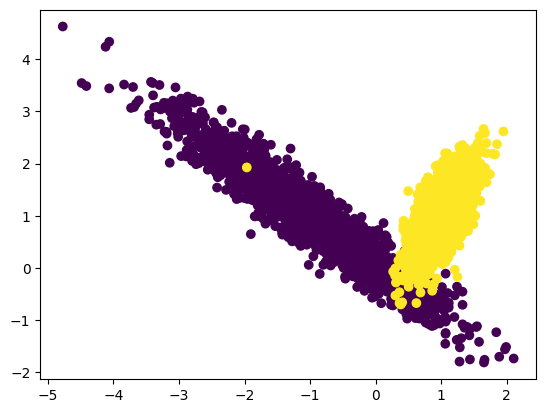

In [17]:
plt.scatter(X_undersampled[:, 0], X_undersampled[:, 1], c=y_undersampled)

### 2. Class Weight Adjustment
Instead of modifying the dataset, some models allow adjusting the class weight to give more importance to minority class.
##### - Using Class Weights in Models
Most ML Algorithms allow class weighting. This means the model penalizes misclassification of the minority class more than the majority class.

In [23]:
from sklearn.linear_model import LogisticRegression

# Automatically balance classes
model = LogisticRegression(class_weight='balanced')
model.fit(X,y)

LogisticRegression(class_weight='balanced')